<a href="https://colab.research.google.com/github/Varshitha1711/Deep_learningCNN/blob/main/Multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
from PIL import Image
import matplotlib.pyplot as plt

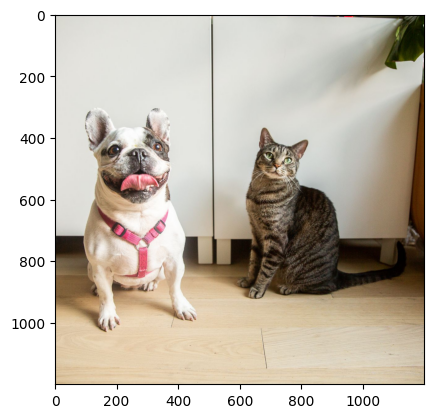

In [14]:
InputImg = Image.open("/content/drive/My Drive/DL_data/Dog+and+Cat.jpg")
plt.imshow(InputImg)

In [16]:
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])
InputImg_t = transform(InputImg)
print(InputImg_t.shape)

torch.Size([3, 224, 224])


In [17]:
import torch
InputImg_bt = torch.unsqueeze(InputImg_t, 0);
print(InputImg_bt.shape)
from torchvision import models
dir(models)

torch.Size([1, 3, 224, 224])


['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [19]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()
output = alexnet(InputImg_bt)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 147MB/s]


In [20]:
with open('/content/drive/My Drive/DL_data/imagenet1000Classes.txt') as classesfile:
  ImageNetclasses = [line.strip() for line in classesfile.readlines()]

_, predictedLabels = torch.sort(output, descending=True)
percentage = torch.sigmoid(output)[0] * 100
[(ImageNetclasses[index], percentage[index].item()) for index in predictedLabels[0][:5]]


[("281: 'tabby, tabby cat',", 99.99849700927734),
 ("285: 'Egyptian cat',", 99.99629211425781),
 ("174: 'Norwegian elkhound, elkhound',", 99.99514770507812),
 ("245: 'French bulldog',", 99.99327850341797),
 ("254: 'pug, pug-dog',", 99.99275207519531)]